### 我們想利用https://tw.appledaily.com/ 提供的關鍵字查找新聞的方法，去針對result抓取資料
 - 首先我們觀察到result並不會一次把結果顯示出來，需要手動點選一個button才會在load資料
 - 所以我們使用selenium 套件去幫我們click button 顯示所有的資料
 - 在整理成抓取每篇新聞的時間並做count次數，以週次跟年份作整理。
 
 
 <(skip) input type="button" id="moreButton" style="cursor: pointer;" class="more" value="顯示更多結果" (skip)>
 - <input type="button" id="moreButton" style="cursor: pointer;" class="more" value="顯示更多結果">

<img src='fig1.png',width=600,height=150>

<img src='fig2.png',width=600,height=150>

In [1]:
from selenium.webdriver import Chrome
import time
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import re
YOUR_PAGE_URL = 'https://tw.appledaily.com/search/result?sort=time&searchType=all&dateStart=2003%2F05%2F02&dateEnd=2018%2F11%2F26&querystrS=%E8%85%B8%E7%97%85%E6%AF%92'

NEXT_BUTTON_XPATH = '//input[@type="button" and @value="顯示更多結果"]'  #get tag using Xpath

browser = Chrome('./chromedriver.exe')
browser.get(YOUR_PAGE_URL)
browser.implicitly_wait(10)
myDynamicElement = browser.find_element_by_id("moreButton")

for i in range(70): # 每次顯示19個資料 總查詢為1535筆 大概是70次就能抓出我們想要的時間區間 (2010-2017)
    myDynamicElement.click()
    time.sleep(0.1)
element = browser.find_element(By.ID, "result")
element.find_elements_by_tag_name("time")
bs = BeautifulSoup(element.text, 'html5lib')
get_time=[]
get_time.append(bs)

text_=[]
for i in get_time[0].text.split('\n'):

    for x in re.findall("[0-9]{8,8}$", i): # 抓出純數字 設定{8,8}八個字元
        if len(x) !=0: # is not empty 條件
            
            text_.append(x)
            
text_

# select = browser.find_element(By.CLASS_NAME, "content")
# alldata = select.find_elements_by_tag_name("time")
# for option in alldata:
#     print(BeautifulSoup(option, 'html5lib'))
#     get_time.append(option.text)



['20181120',
 '20181117',
 '20181022',
 '20181017',
 '20181016',
 '20181016',
 '20181015',
 '20181013',
 '20181012',
 '20181005',
 '20181004',
 '20181004',
 '20180928',
 '20180925',
 '20180921',
 '20180917',
 '20180915',
 '20180915',
 '20180913',
 '20180904',
 '20180903',
 '20180902',
 '20180902',
 '20180901',
 '20180831',
 '20180828',
 '20180824',
 '20180823',
 '20180817',
 '20180815',
 '20180815',
 '20180814',
 '20180814',
 '20180813',
 '20180810',
 '20180807',
 '20180807',
 '20180806',
 '20180803',
 '20180803',
 '20180802',
 '20180801',
 '20180731',
 '20180724',
 '20180719',
 '20180718',
 '20180717',
 '20180712',
 '20180710',
 '20180709',
 '20180708',
 '20180707',
 '20180704',
 '20180703',
 '20180703',
 '20180703',
 '20180628',
 '20180626',
 '20180626',
 '20180625',
 '20180619',
 '20180617',
 '20180613',
 '20180613',
 '20180612',
 '20180612',
 '20180612',
 '20180608',
 '20180605',
 '20180529',
 '20180529',
 '20180525',
 '20180523',
 '20180523',
 '20180522',
 '20180521',
 '20180520',

In [2]:
# get_time[0].text
# re.findall("[0-9]{8,8}$", ".\n20181120\n")

In [49]:
import pandas as pd
from isoweek import Week
import datetime

year=[]
week=[]
for i in text_:
    format_=datetime.datetime.strptime(i, '%Y%m%d')
    year.append(format_.isocalendar()[0]) #抓出年
    week.append(format_.isocalendar()[1]) #抓出週次
    
df=pd.DataFrame({'appledaily_news_date':text_, '年':year, '週別':week, 'values':[1 for x in range(len(text_))]}) 

In [94]:
df3=df.groupby(['年','週別']).sum()

# df3=df.groupby(['年','週別'])['values'].apply(lambda x: x.sum())
df3.values

array([[ 1],
       [ 2],
       [ 1],
       [ 2],
       [ 2],
       [ 1],
       [ 3],
       [ 1],
       [ 1],
       [ 4],
       [ 1],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 4],
       [ 1],
       [ 7],
       [ 1],
       [ 4],
       [ 4],
       [ 2],
       [ 4],
       [ 2],
       [ 3],
       [ 2],
       [ 1],
       [ 2],
       [ 1],
       [ 4],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 4],
       [ 1],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 3],
       [ 3],
       [ 1],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 2],
       [ 2],
       [ 1],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 1],
       [ 1],
       [ 4],
       [ 6],
       [ 1],
       [ 2],
       [ 1],
       [ 1],

In [100]:
tmp_df = df.copy()
tmp_df.index = [df['年'], df['週別']]
tmp_df=tmp_df.groupby(['年','週別']).sum()
tmp_df.to_csv('appledaily_newscount.csv')


C:\Users\emprise\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: '年' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\emprise\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: '週別' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 499 entries, (2004, 47) to (2018, 47)
Data columns (total 1 columns):
values    499 non-null int64
dtypes: int64(1)
memory usage: 5.6 KB


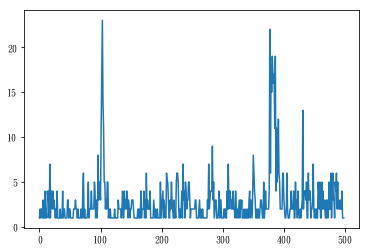

In [103]:
import matplotlib.pyplot as plt
tmp_df.info()
plt.plot(tmp_df.values)
plt.show()